In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [41]:
dataset=pd.read_csv('/home/swadhin/GitHubproject/machinelearning/datasets/algrean_forest_dataset(clean).csv')
dataset.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [42]:
dataset.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [43]:
## Drop the columns which are not required
dataset.drop(['day','month','year'],axis=1,inplace=True)
dataset.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [44]:
dataset.columns

Index(['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI',
       'FWI', 'Classes', 'Region'],
      dtype='object')

In [45]:
## Encoding 
dataset['Classes']=np.where(dataset['Classes'].str.contains('not fire'),0,1)
dataset['Classes'].value_counts()



Classes
1    137
0    106
Name: count, dtype: int64

In [46]:
## independent and dependent features
X=dataset.drop('FWI',axis=1)
y=dataset['FWI']



In [47]:
## Train Test Split
from sklearn.model_selection import train_test_split
X_tarin,X_test,y_tain,y_test=train_test_split(X,y,test_size=0.25,random_state=42)



In [48]:
X_tarin.shape

(182, 11)

In [49]:
## Feature Scaling

X_tarin.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.656095,-0.305977,-0.317512,0.694768,0.498173,0.390684,0.629848,0.473609,0.542141,0.254549
RH,-0.656095,1.000000,0.225736,0.241656,-0.653023,-0.414601,-0.236078,-0.717804,-0.362317,-0.456876,-0.394665
Ws,-0.305977,0.225736,1.000000,0.251932,-0.190076,0.000379,0.096576,-0.023558,0.035633,-0.082570,-0.199969
Rain,-0.317512,0.241656,0.251932,1.000000,-0.545491,-0.289754,-0.302341,-0.345707,-0.300964,-0.369357,-0.059022
FFMC,0.694768,-0.653023,-0.190076,-0.545491,1.000000,0.620807,0.524101,0.750799,0.607210,0.781259,0.249514
DMC,0.498173,-0.414601,0.000379,-0.289754,0.620807,1.000000,0.868647,0.685656,0.983175,0.617273,0.212582
DC,0.390684,-0.236078,0.096576,-0.302341,0.524101,0.868647,1.000000,0.513701,0.942414,0.543581,-0.060838
ISI,0.629848,-0.717804,-0.023558,-0.345707,0.750799,0.685656,0.513701,1.000000,0.643818,0.742977,0.296441
BUI,0.473609,-0.362317,0.035633,-0.300964,0.607210,0.983175,0.942414,0.643818,1.000000,0.612239,0.114897
Classes,0.542141,-0.456876,-0.082570,-0.369357,0.781259,0.617273,0.543581,0.742977,0.612239,1.000000,0.188837


<Axes: >

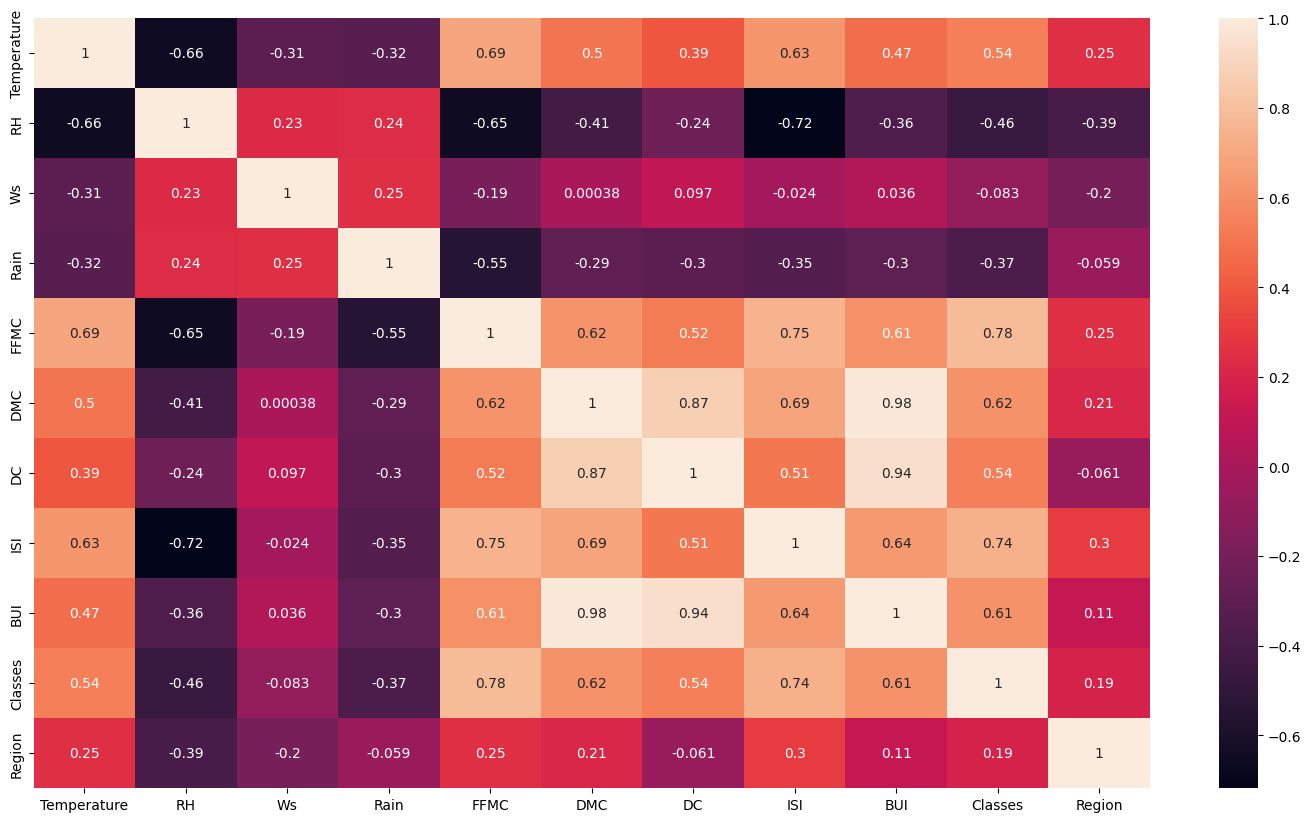

In [50]:
## Cheaking the correlation[Mulicollinearity]
plt.figure(figsize=(18,10))
corr=X_tarin.corr()
sns.heatmap(corr,annot=True)


In [51]:
def correlation(dataset,threshold):
    col_corr=set()
    corr_matrix=dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>threshold:
                colname=corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr
  

In [52]:
corr_fectures=correlation(X_tarin,0.85)

In [53]:
#Drop the columns which are highly correlated

X_tarin.drop(corr_fectures,axis=1,inplace=True)
X_test.drop(corr_fectures,axis=1,inplace=True)
X_tarin.shape,X_test.shape

((182, 9), (61, 9))

# Feacture Scaling

In [54]:
from sklearn.preprocessing import StandardScaler
scaller=StandardScaler()
X_tarin_scale=scaller.fit_transform(X_tarin)
X_test_scale=scaller.transform(X_test)


In [55]:
X_tarin_scale

array([[-0.84284248,  0.78307967,  1.29972026, ..., -0.62963326,
        -1.10431526, -0.98907071],
       [-0.30175842,  0.64950844, -0.59874754, ..., -0.93058524,
        -1.10431526,  1.01105006],
       [ 2.13311985, -2.08870172, -0.21905398, ...,  2.7271388 ,
         0.90553851,  1.01105006],
       ...,
       [-1.9250106 ,  0.9166509 ,  0.54033314, ..., -1.06948615,
        -1.10431526, -0.98907071],
       [ 0.50986767, -0.21870454,  0.16063958, ...,  0.5973248 ,
         0.90553851,  1.01105006],
       [-0.57230045,  0.98343651,  2.05910739, ..., -0.86113478,
        -1.10431526, -0.98907071]])

### Box plot to understand Effect of Standard Scaler



Text(0.5, 1.0, 'After Scaling')

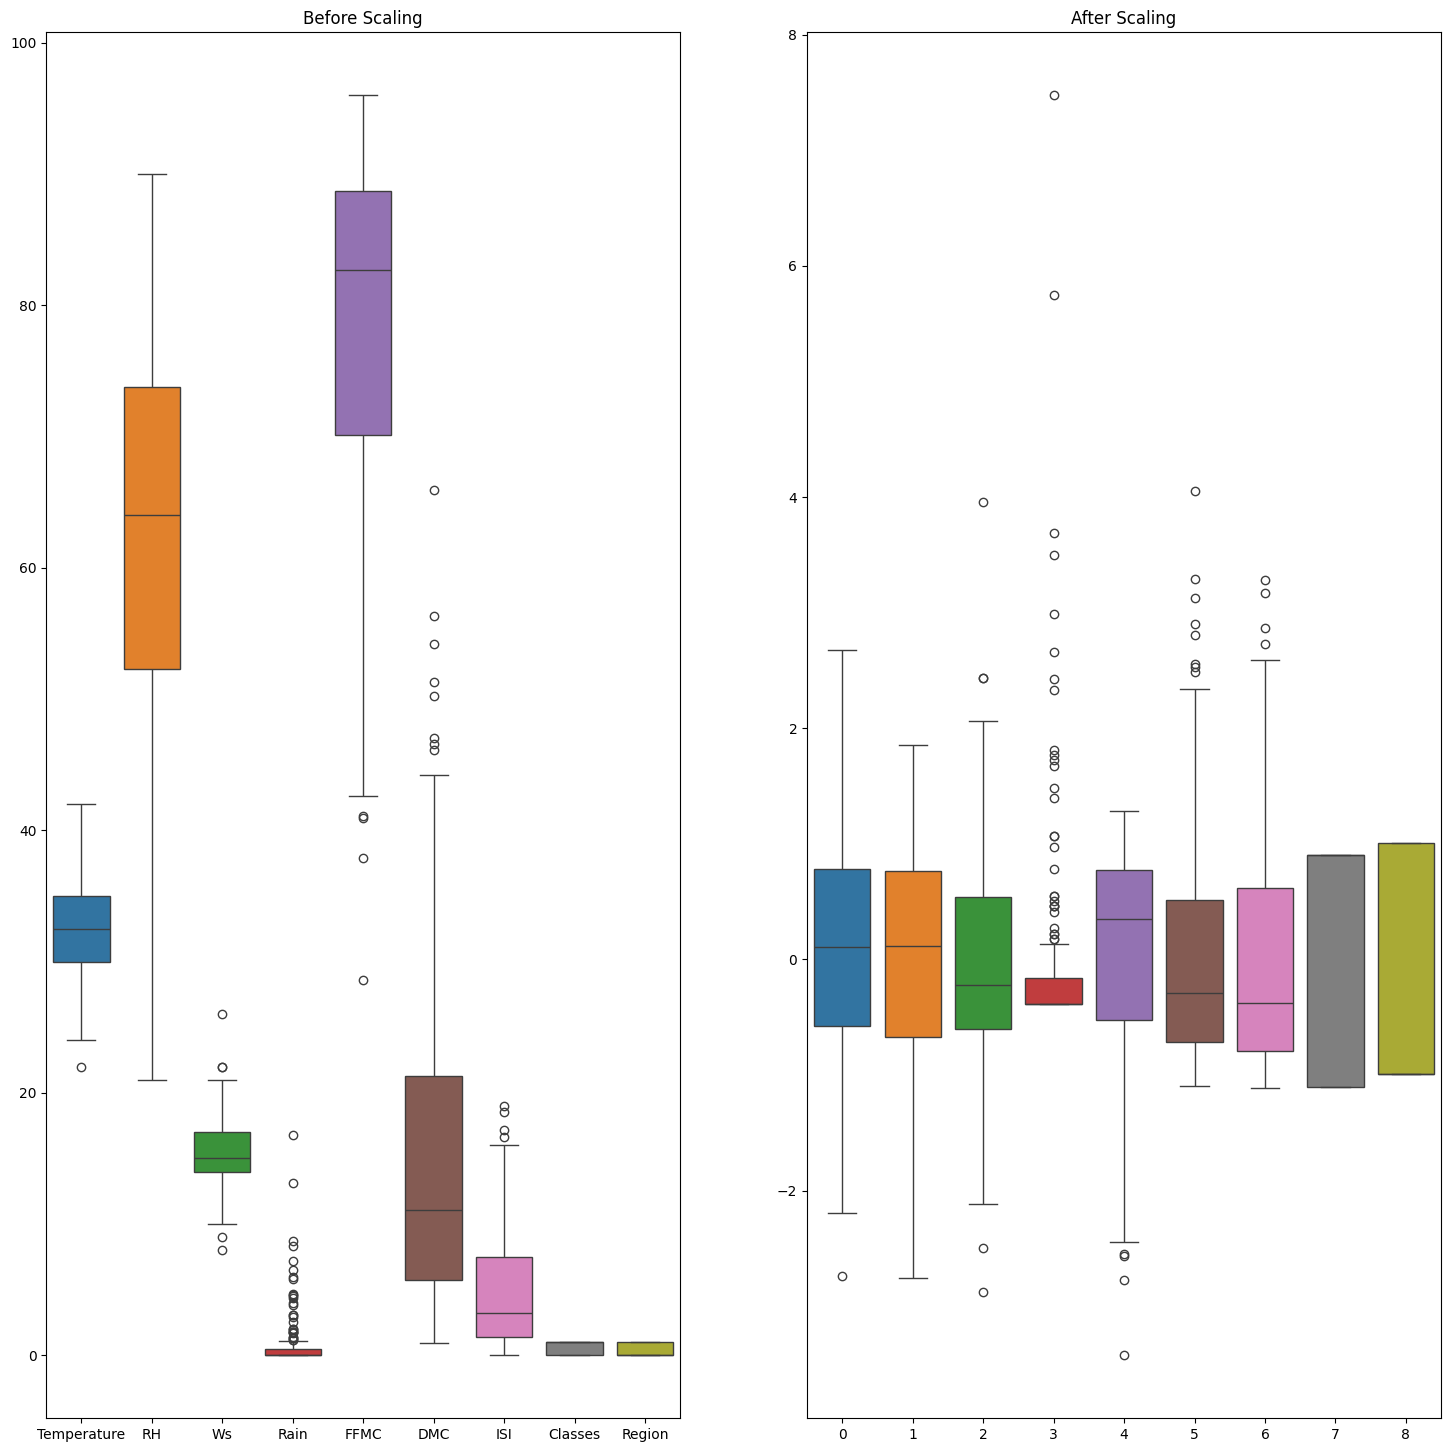

In [35]:
## Cheaking the distribution of the data  before and after scaling
plt.figure(figsize=(18,18))
plt.subplot(1,2,1)
sns.boxplot(data=X_tarin)
plt.title('Before Scaling')
plt.subplot(1,2,2)
sns.boxplot(data=X_tarin_scale)
plt.title('After Scaling')

# Linear Regression Model

Mean Absolute Error: 0.5468236465249976
R2 Score: 0.9847657384266951


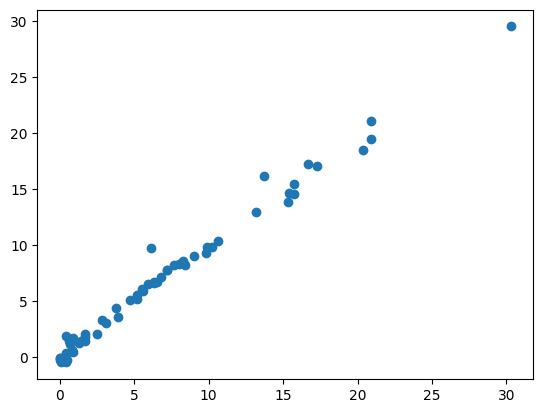

In [59]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,r2_score
linreg=LinearRegression()
linreg.fit(X_tarin_scale,y_tain)
y_pred=linreg.predict(X_test_scale)
absmean=mean_absolute_error(y_test,y_pred)
r2score=r2_score(y_test,y_pred)
print('Mean Absolute Error:',absmean)
print('R2 Score:',r2score)
plt.scatter(y_test,y_pred)



In [60]:
##lasso regression

Mean Absolute Error: 1.1331759949144087
R2 Score: 0.9492020263112388


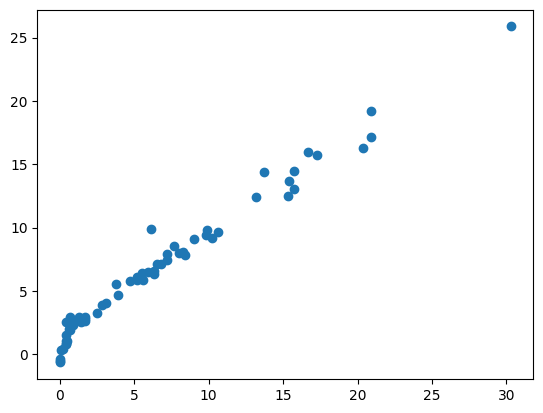

In [61]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error,r2_score
linreg=Lasso()
linreg.fit(X_tarin_scale,y_tain)
y_pred=linreg.predict(X_test_scale)
absmean=mean_absolute_error(y_test,y_pred)
r2score=r2_score(y_test,y_pred)
print('Mean Absolute Error:',absmean)
print('R2 Score:',r2score)
plt.scatter(y_test,y_pred)



In [64]:

##Lasso regression cross VALIDATION

from sklearn.linear_model import LassoCV
from sklearn.metrics import mean_absolute_error,r2_score
lassocv=LassoCV(cv=5)
lassocv.fit(X_tarin_scale,y_tain)
 


LassoCV(cv=5)

In [65]:
lassocv.predict(X_test_scale) 

array([ 8.17490595,  7.68312478, -0.25676525,  4.72643402,  6.78715772,
        1.77624325,  2.23148094,  7.64057821,  1.99176323,  3.39941035,
        0.62808928,  9.95945488,  9.36168319, 16.98503659, 18.28488762,
        1.61644108,  1.62751276, -0.6415713 ,  7.28510526,  3.10926518,
        1.95541903,  0.18069335,  6.47563129,  0.14318503, 20.99597009,
        5.11755206,  5.86208849,  9.75914403, -0.77037467,  9.91838577,
        6.72277075, -0.31776007, 10.31109643, 14.4365551 ,  1.71022677,
        0.83439752,  2.03414915,  5.97488529, -0.6263644 , -0.56200288,
        6.47253729,  2.07971408,  8.46741557, -0.8464481 , 15.40443856,
        8.32941189,  8.48782486,  1.44030355, 13.02752812,  1.20911545,
       29.08623849,  5.49737681, 17.15937199, 19.28890096, 13.71102991,
       16.05355549,  0.99056448,  9.0873725 ,  3.84455993, 14.43991192,
        5.23034139])

In [66]:
lassocv.alpha_

0.05725391318234408

In [67]:
lassocv.alphas_

array([7.05853002, 6.58280872, 6.13914944, 5.72539132, 5.33951911,
       4.97965339, 4.64404142, 4.33104857, 4.03915039, 3.76692517,
       3.51304702, 3.27627941, 3.05546914, 2.84954075, 2.65749124,
       2.47838523, 2.31135036, 2.15557308, 2.01029467, 1.87480753,
       1.74845178, 1.63061198, 1.52071419, 1.41822315, 1.32263965,
       1.23349817, 1.15036452, 1.0728338 , 1.00052839, 0.93309613,
       0.87020857, 0.81155943, 0.75686304, 0.705853  , 0.65828087,
       0.61391494, 0.57253913, 0.53395191, 0.49796534, 0.46440414,
       0.43310486, 0.40391504, 0.37669252, 0.3513047 , 0.32762794,
       0.30554691, 0.28495408, 0.26574912, 0.24783852, 0.23113504,
       0.21555731, 0.20102947, 0.18748075, 0.17484518, 0.1630612 ,
       0.15207142, 0.14182231, 0.13226397, 0.12334982, 0.11503645,
       0.10728338, 0.10005284, 0.09330961, 0.08702086, 0.08115594,
       0.0756863 , 0.0705853 , 0.06582809, 0.06139149, 0.05725391,
       0.05339519, 0.04979653, 0.04644041, 0.04331049, 0.04039

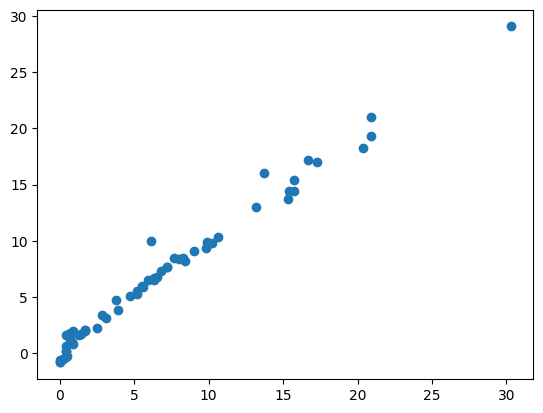

In [68]:
y_pred=lassocv.predict(X_test_scale)
plt.scatter(y_test,y_pred)

In [71]:
mean=mean_absolute_error(y_test,y_pred)
rscore=r2_score(y_test,y_pred)

mean,rscore



(0.6199701158263434, 0.9820946715928274)

## Ridge Regression Model

Mean Absolute Error: 0.5642305340105693
R2 Score: 0.9842993364555513


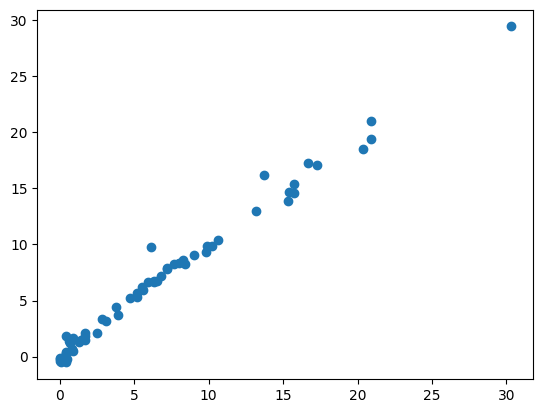

In [62]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error,r2_score
linreg=Ridge()
linreg.fit(X_tarin_scale,y_tain)
y_pred=linreg.predict(X_test_scale)
absmean=mean_absolute_error(y_test,y_pred)
r2score=r2_score(y_test,y_pred)
print('Mean Absolute Error:',absmean)
print('R2 Score:',r2score)
plt.scatter(y_test,y_pred)


(0.5642305340105693, 0.9842993364555513)

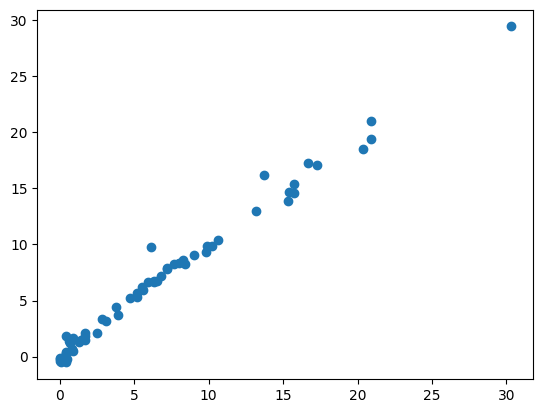

In [74]:
from sklearn.linear_model import RidgeCV

ridgecv=RidgeCV(cv=5)
ridgecv.fit(X_tarin_scale,y_tain)
y_pred=ridgecv.predict(X_test_scale)
plt.scatter(y_test,y_pred)
mean=mean_absolute_error(y_test,y_pred)
rscore=r2_score(y_test,y_pred)
mean,rscore

In [75]:
ridgecv.alpha_

1.0

### Elasticnet Regression

Mean Absolute Error: 1.8822353634896
R2 Score: 0.8753460589519703


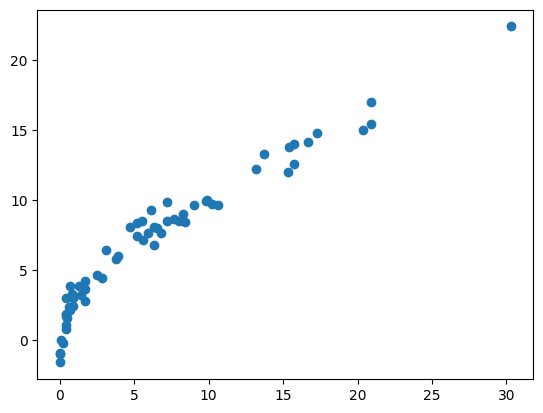

In [63]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error,r2_score
linreg=ElasticNet()
linreg.fit(X_tarin_scale,y_tain)
y_pred=linreg.predict(X_test_scale)
absmean=mean_absolute_error(y_test,y_pred)
r2score=r2_score(y_test,y_pred)
print('Mean Absolute Error:',absmean)
print('R2 Score:',r2score)
plt.scatter(y_test,y_pred)